<a href="https://colab.research.google.com/github/manasb26/coursera_tensorflow_exercises/blob/master/Sarcasm_Dataset_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print(tf.__version__)

2.2.0-rc3


In [2]:
#Sarcasm data modified
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

import json

with open("/tmp/sarcasm.json", "r") as file:
  datastore = json.load(file)

sentences = []
labels = []
links = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  links.append(item['article_link'])  

--2020-04-16 21:14:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c0a::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2020-04-16 21:14:17 (43.0 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
#hyper parameters
vocab_size = 10000 
embedding_dim = 16
max_length = 32
trunc_type ='post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

#splitting training and testing sets
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]


In [17]:
import numpy as np

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentence)
word_index  = tokenizer.word_index

print(len(word_index))

train_sequences = tokenizer.texts_to_sequences(training_sentences)
train_padded_seq  = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type,truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(testing_sentences)
test_padded_seq  = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type,truncating=trunc_type)

train_padded_seq = np.array(train_padded_seq)
training_labels = np.array(training_labels)
test_padded_seq = np.array(test_padded_seq)
testing_labels = np.array(testing_labels)

print(training_sentence[2])
print(train_sequences[2])
print(padded_seq[0])
print(padded_seq.shape)

25637
mom starting to fear son's web series closest thing she will have to grandchild
[153, 890, 2, 891, 1445, 2215, 595, 5650, 221, 133, 36, 45, 2, 8864]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  328    1  799 3405 2404   47  389 2214    1    6 2614 8863]
(20000, 40)


In [0]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.AveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
  ])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()
no_of_epochs = 30

history = model.fit(train_padded_seq, training_labels, epochs=no_of_epochs, validation_data=(test_padded_seq,testing_labels), verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
average_pooling1d_1 (Average (None, 16, 16)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 16, 24)            408       
_________________________________________________________________
dense_3 (Dense)              (None, 16, 1)             25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
625/625 - 2s - loss: 0.6662 - accuracy: 0.5893 - val_loss: 0.6540 - val_accuracy: 0.6013
Epoch 2/30
625/625 - 2s - loss: 0.6430 - accuracy: 0.6108 - val_loss: 0.6522 - val_accuracy: 0.6025
Epoch 3/30
625/625 - 2s - loss: 0.6361 - accur

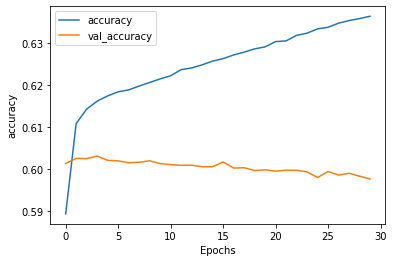

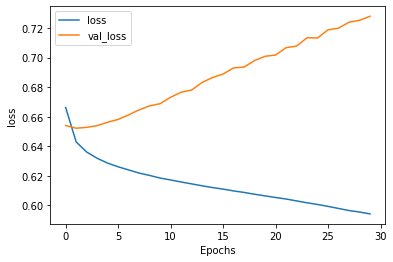

In [21]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')